<a href="https://colab.research.google.com/github/ykworx/tls/blob/master/MultivariateLogNormal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Multivariate Log-Normal Distribution

## Scalar

In [0]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


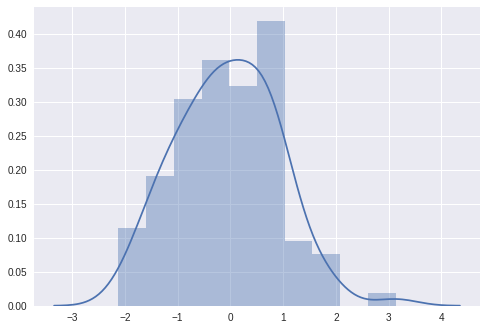

In [21]:
rv1 = sp.stats.norm()
rv2 = sp.stats.lognorm(1)

sns.distplot(np.log(rv2.rvs(100)))
plt.show()

## Multivariate Normal Distribution (다변량 정규 분포)
다변량 정규 분포는 두 개 이상의 다변량에 대해서 정규 분포를 따르는 형태의 분포를 뜻한다.



/usr/local/lib/python3.6/dist-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


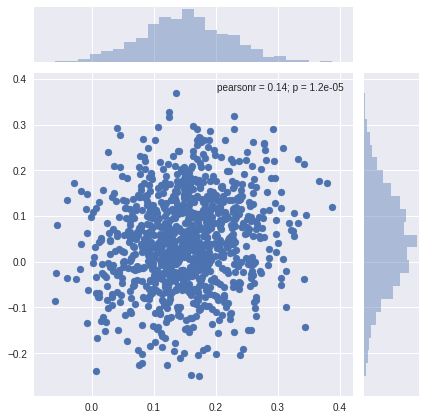

In [22]:
mu0 = np.array([0.15, 0.05])
sigma0 = np.array([[0.005, 0.001], [0.001, 0.01]])
dt = 1.0

rv3 = sp.stats.multivariate_normal(mu0 * dt, sigma0 * np.sqrt(dt))

X = rv3.rvs(1000)

sns.jointplot(X[:, 0], X[:, 1])
plt.show()

## Multivariate Log-Normal Distribution (다변량 로그 정규 분포)

In [0]:
def mlognormal(mu0, sigma0, dt, N):
    covinv = np.linalg.inv(np.diag(np.sqrt(np.diag(sigma0))))
    corrmat = covinv.dot(sigma0).dot(covinv)
    
    mu = mu0 * dt
    sigma = sigma0 * np.sqrt(dt)
    sigma_vec = np.diag(sigma)
    sigma_down = np.tile(sigma_vec, (len(sigma_vec), 1))
    sigma_acrs = sigma_down.T
    cov = np.log(corrmat * \
                 np.sqrt(np.exp(sigma_down ** 2) - 1.0) * \
                 np.sqrt(np.exp(sigma_acrs ** 2) - 1.0) + 1.0)
    
    rv = sp.stats.multivariate_normal(mu, cov)
    X = np.exp(rv.rvs(N))
    
    return X

In [0]:
mu0 = np.array([0.2, 0.1])
sigma0 = np.array([[0.04, 0.02], [0.02, 0.02]])
X = mlognormal(mu0, sigma0, 200, 10000)

/usr/local/lib/python3.6/dist-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


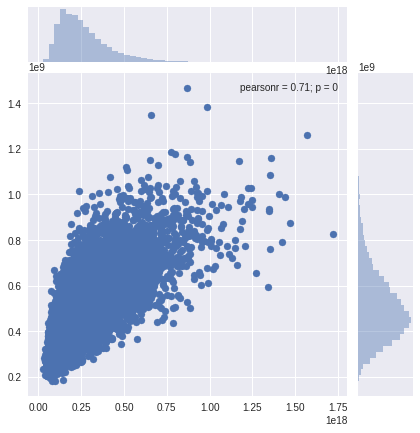

In [25]:
sns.jointplot(X[:, 0], X[:, 1])
plt.show()

In [0]:
mu0 = np.array([0.3, 0.2, 0.1])
sigma0 = np.array([[0.05, 0.00, 0.02], 
                   [0.00, 0.04, 0.02], 
                   [0.02, 0.02, 0.03]])
X = mlognormal(mu0, sigma0, 200, 10000)

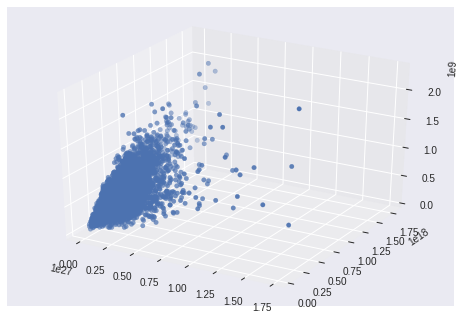

In [28]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:, 0], X[:, 1], X[:, 2])
plt.show()